In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
! kaggle competitions download -c spaceship-titanic


  0%|          | 0.00/299k [00:00<?, ?B/s]
100%|##########| 299k/299k [00:00<00:00, 2.91MB/s]
100%|##########| 299k/299k [00:00<00:00, 2.91MB/s]


In [2]:
import zipfile

with zipfile.ZipFile('spaceship-titanic.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [3]:
import pandas as pd

In [7]:
raw_df = pd.read_csv('train.csv')

In [5]:
len(raw_df)

8693

In [4]:
raw_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
raw_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


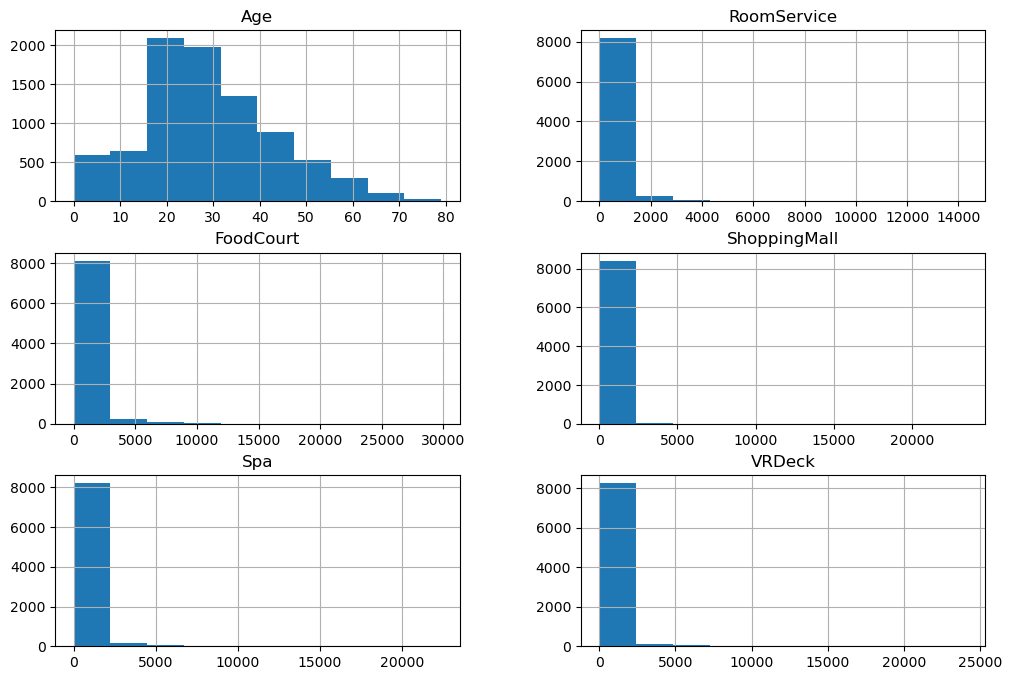

In [7]:
raw_df.hist(bins=10, figsize=(12, 8))
plt.show()

## Preprocessing and Feature Engineering

In [8]:
from pandas.core.dtypes.common import is_object_dtype
from sklearn.preprocessing import StandardScaler

purchase_cols = ['FoodCourt', 'Spa', 'RoomService', 'ShoppingMall', 'VRDeck']
bool_cols = ['CryoSleep', 'VIP']
categorical_cols = ['HomePlanet', 'Destination']
numerical_cols = ['Age'] + purchase_cols
cabin_raw_col = 'Cabin'
cabin_cols = ['Cabin_deck', 'Cabin_num', 'Cabin_side']


def handle_purchasing_data(df):
    for col in purchase_cols:
        df[col] = df[col].fillna(0)
        df[f'purchased_{col}'] = (df[col] == 1).astype(int)
    return df


def handle_binary_data(df):
    for col in bool_cols:
        df[col] = df[col].fillna(df[col].median()).astype(int)
    return df


def handle_categorical_data(df):
    for col in categorical_cols:
        df = df.join(pd.get_dummies(df[col], prefix=col))
        df = df.drop(col, axis=1)
    return df


def handle_cabin_data(df):
    df[cabin_cols] = df[cabin_raw_col].str.split('/', expand=True)
    df = df.drop(cabin_raw_col, axis=1)

    for col in cabin_cols:
        df[col] = df[col].fillna(method='bfill')

    df['Cabin_num'] = df['Cabin_num'].astype(int)

    for col in cabin_cols:
        if is_object_dtype(df[col].dtype):
            df = df.join(pd.get_dummies(df[col], prefix=col))
    return df

In [9]:
df = raw_df.copy()
df = handle_purchasing_data(df)
df = handle_binary_data(df)
df = handle_categorical_data(df)
df = handle_cabin_data(df)
df['Age'] = df['Age'].fillna(df['Age'].median())
df = df.drop(['Name'], axis=1)

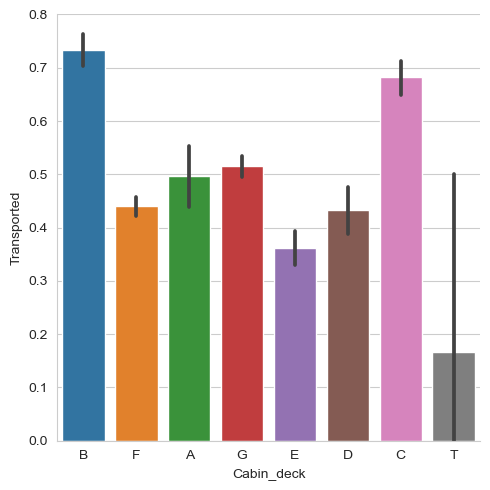

In [10]:
sns.catplot(df, x='Cabin_deck', y='Transported', kind='bar')

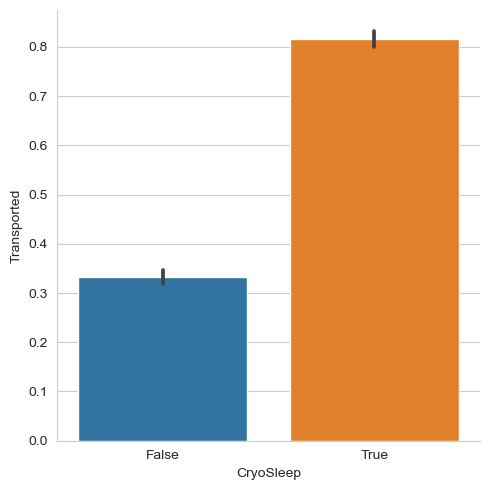

In [24]:
sns.catplot(raw_df.dropna(), x='CryoSleep', y='Transported', kind='bar')

People in CryoSleep are more likely to be transported.

In [162]:
df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,purchased_FoodCourt,...,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,...,0,1,0,0,0,0,0,0,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,0,...,0,0,0,0,0,1,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,...,1,0,0,0,0,0,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,...,1,0,0,0,0,0,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,0,...,0,0,0,0,0,1,0,0,0,1


People in deck B and C are more likely to be transported.

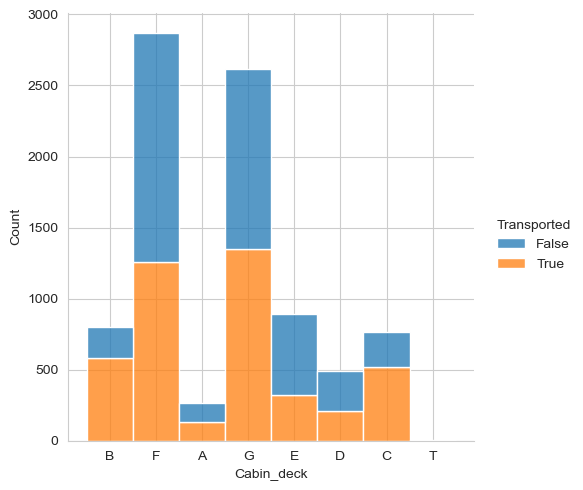

In [123]:
sns.displot(df, x='Cabin_deck', hue='Transported', multiple='stack')

The distribution is skewed with more people stay in deck F & G.

Create a new feature to separate passengers staying in deck B or C from the rest.

In [10]:
def create_feature_is_deck_b_or_c(df):
    df['is_deck_b_or_c'] = df['Cabin_deck'].isin(['B', 'C']).astype(int)
    return df


df = create_feature_is_deck_b_or_c(df)

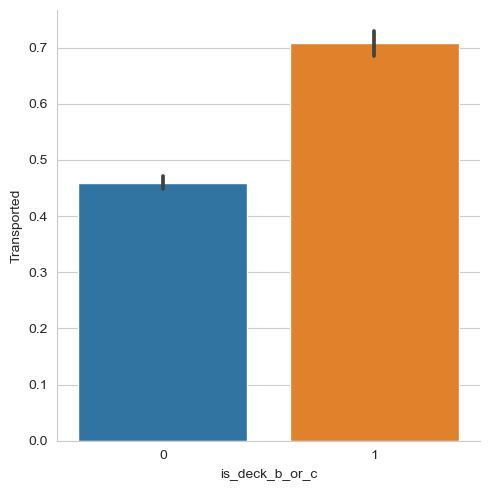

In [11]:
sns.catplot(df, x='is_deck_b_or_c', y='Transported', kind='bar')

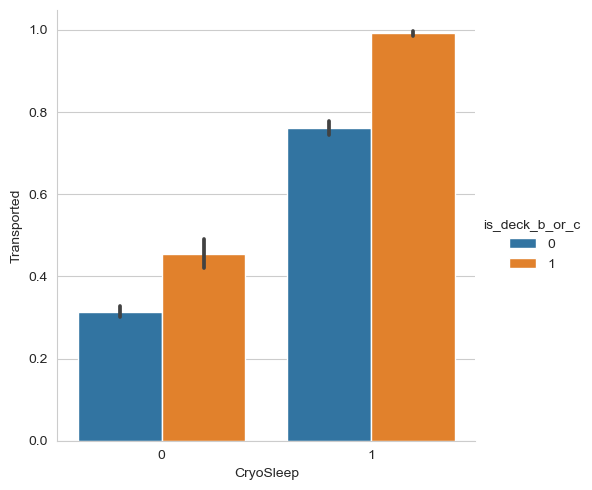

In [12]:
sns.catplot(df, x='CryoSleep', y='Transported', kind='bar', hue='is_deck_b_or_c')

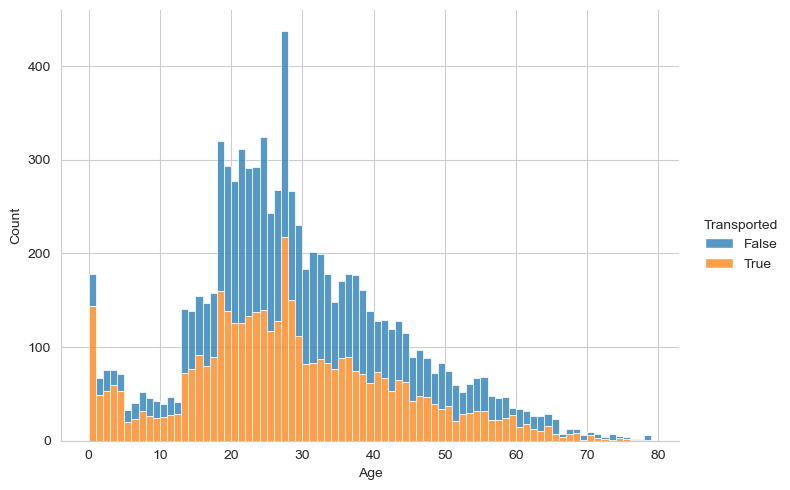

In [13]:
sns.displot(df, x='Age', binwidth=1, hue='Transported', multiple='stack', aspect=11.7 / 8.27)

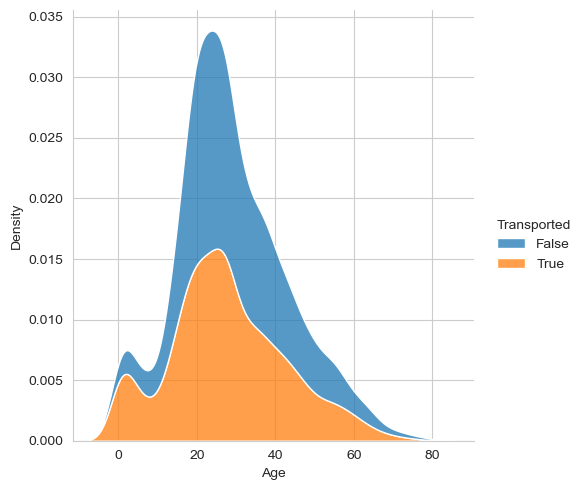

In [14]:
sns.displot(df, x='Age', kind='kde', hue='Transported', multiple='stack')

In [15]:
def create_feature_age_under_13(df):
    df['is_under_13'] = (df['Age'] < 13).astype(int)
    return df


df = create_feature_age_under_13(df)

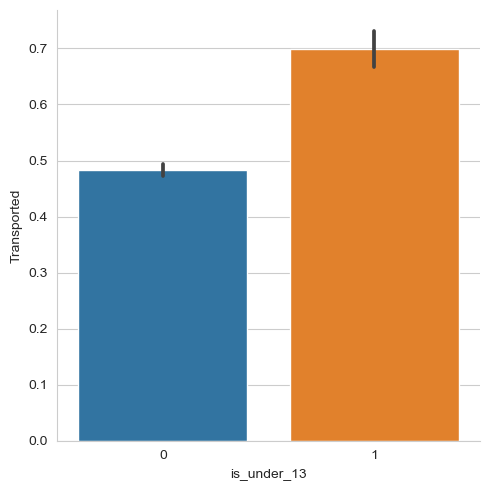

In [16]:
sns.catplot(df, x='is_under_13', y='Transported', kind='bar')

In [17]:
def create_feature_num_people_in_deck(df):
    df['num_people_in_deck'] = df.groupby('Cabin_deck')['Cabin_deck'].transform('count')
    return df


df = create_feature_num_people_in_deck(df)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8693 non-null   int32  
 2   Age                        8693 non-null   float64
 3   VIP                        8693 non-null   int32  
 4   RoomService                8693 non-null   float64
 5   FoodCourt                  8693 non-null   float64
 6   ShoppingMall               8693 non-null   float64
 7   Spa                        8693 non-null   float64
 8   VRDeck                     8693 non-null   float64
 9   Transported                8693 non-null   bool   
 10  purchased_FoodCourt        8693 non-null   int32  
 11  purchased_Spa              8693 non-null   int32  
 12  purchased_RoomService      8693 non-null   int32  
 13  purchased_ShoppingMall     8693 non-null   int32

In [254]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Cabin_deck,Cabin_num,Cabin_side,is_deck_b_or_c,is_under_13
0,Europa,False,TRAPPIST-1e,39.0,False,False,B,0,P,1,0
1,Earth,False,TRAPPIST-1e,24.0,False,True,F,0,S,0,0
2,Europa,False,TRAPPIST-1e,58.0,True,False,A,0,S,0,0
3,Europa,False,TRAPPIST-1e,33.0,False,False,A,0,S,0,0
4,Earth,False,TRAPPIST-1e,16.0,False,True,F,1,S,0,0


In [181]:
df.describe()

,Age
count,8693.000000
mean,28.790291
std,14.341404
min,0.000000
25%,20.000000
50%,27.000000
75%,37.000000
max,79.000000


In [19]:
corr_matrix = df.corr()
corr_matrix['Transported'].sort_values(ascending=False)

C:\Users\steve\AppData\Local\Temp\ipykernel_29444\3200236396.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Transported                  1.000000
CryoSleep                    0.460132
is_deck_b_or_c               0.191123
HomePlanet_Europa            0.176916
Cabin_deck_B                 0.145592
is_under_13                  0.125399
Cabin_deck_C                 0.110704
Destination_55 Cancri e      0.108722
Cabin_side_S                 0.104279
FoodCourt                    0.045583
HomePlanet_Mars              0.019544
Cabin_deck_G                 0.014815
ShoppingMall                 0.009391
Destination_PSO J318.5-22    0.000092
Cabin_deck_A                -0.002623
Cabin_deck_T                -0.017712
Cabin_deck_D                -0.034752
VIP                         -0.037261
purchased_RoomService       -0.037785
purchased_Spa               -0.038546
purchased_VRDeck            -0.042194
Cabin_num                   -0.046043
purchased_FoodCourt         -0.065007
purchased_ShoppingMall      -0.070084
Age                         -0.074233
num_people_in_deck          -0.076707
Cabin_deck_F

In [21]:
binary_purchasing_features = [f'purchased_{col}' for col in purchase_cols]
bc_purchasing_features = [f'bc_{col}' for col in purchase_cols]


def normalize_numerical_features(df):
    for col in numerical_cols:
        values = np.asarray(df[col])
        values = values.reshape([-1, 1])

        std_scaler = StandardScaler()
        std_scaler.fit(values)
        df[col] = std_scaler.transform(values)
    return df


def preprocess(raw_df):
    df = raw_df.copy()
    df = handle_binary_data(df)
    df = handle_categorical_data(df)
    df = handle_cabin_data(df)
    df = handle_purchasing_data(df)
    df = create_feature_is_deck_b_or_c(df)
    df = create_feature_age_under_13(df)
    df = create_feature_num_people_in_deck(df)
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df = normalize_numerical_features(df)

    df['Cabin_side'] = (df['Cabin_side'] == 'P').astype(int)
    df = df.drop(['PassengerId', 'Name', 'Cabin_deck'], axis=1)
    return df


cleaned_df = preprocess(raw_df)

CryoSleep                    0.111812
Spa                          0.074403
RoomService                  0.074213
ShoppingMall                 0.064309
VRDeck                       0.057068
FoodCourt                    0.040064
is_deck_b_or_c               0.024628
num_people_in_deck           0.018266
Cabin_num                    0.017394
Destination_55 Cancri e      0.013899
Cabin_deck_B                 0.013763
Cabin_deck_C                 0.013359
HomePlanet_Europa            0.012171
Age                          0.011190
Cabin_side                   0.008760
Cabin_side_P                 0.004052
purchased_RoomService        0.002633
purchased_ShoppingMall       0.002265
Cabin_side_S                 0.000500
purchased_VRDeck             0.000219
is_under_13                  0.000000
VIP                          0.000000
purchased_Spa                0.000000
purchased_FoodCourt          0.000000
HomePlanet_Earth             0.000000
Cabin_deck_T                 0.000000
Cabin_deck_G

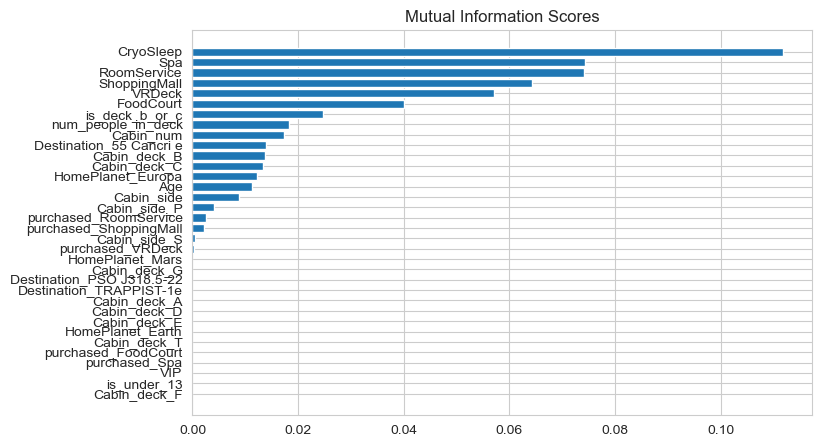

In [22]:
from sklearn.feature_selection import mutual_info_regression


def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


mi_scores = make_mi_scores(cleaned_df.drop(['Transported'], axis=1), cleaned_df['Transported'])
print(mi_scores)


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [12]:
mi_scores.index[:10]

Index(['CryoSleep', 'RoomService', 'Spa', 'VRDeck', 'ShoppingMall',
       'FoodCourt', 'num_people_in_deck', 'Cabin_num',
       'Destination_55 Cancri e', 'purchased_ShoppingMall'],
      dtype='object')

In [23]:
features_to_use = ['CryoSleep', 'is_deck_b_or_c', 'is_under_13', 'Age', 'num_people_in_deck']
features_to_use += purchase_cols
features_to_use += ['Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F',
                    'Cabin_deck_G', 'Cabin_deck_T', 'Cabin_side_P', 'Cabin_side_S']


def split_features_labels(df):
    X = df[features_to_use]
    y = df['Transported']
    return X, y


X, y = split_features_labels(cleaned_df)

Split dataset, 500 for validation and 500 for testing

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=500, random_state=42)

## Logistic classifier

In [25]:
from sklearn.linear_model import LogisticRegressionCV

logit_clf = LogisticRegressionCV(max_iter=200, random_state=42)
logit_clf.fit(X_train, y_train)
print('Validation score:', logit_clf.score(X_val, y_val))

Validation score: 0.764


## Decision tree classifier

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': [i for i in range(5, 10)]}

tree_clf = DecisionTreeClassifier(random_state=42)

grid_tree_clf = GridSearchCV(tree_clf, param_grid=param_grid)
grid_tree_clf.fit(X_train, y_train)

print('Best params:', grid_tree_clf.best_params_)
print('Best train score:', grid_tree_clf.best_score_)
print('Best validation score:', grid_tree_clf.score(X_val, y_val))

Best params: {'max_depth': 8}
Best train score: 0.780708936527612
Best validation score: 0.778


## Extra tree classifier

In [27]:
from sklearn.tree import ExtraTreeClassifier

extra_tree_clf = ExtraTreeClassifier(random_state=42)
extra_tree_clf.fit(X_train, y_train)
extra_tree_clf.score(X_val, y_val)

0.694

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

param_grid = {'n_estimators': [100, 200, 500, 1000],
              'max_samples': [i for i in range(100, 1001, 100)]}

bag_et_clf = BaggingClassifier(ExtraTreeClassifier(random_state=42),
                               random_state=42)
grid_bag_et_clf = GridSearchCV(bag_et_clf, param_grid=param_grid)
grid_bag_et_clf.fit(X_train, y_train)

print('Best params:', grid_bag_et_clf.best_params_)
print('Best train score:', grid_bag_et_clf.best_score_)
print('Best validation score:', grid_bag_et_clf.score(X_val, y_val))

Best params: {'max_samples': 400, 'n_estimators': 1000}
Best train score: 0.8031962220245019
Best validation score: 0.774


## Random forest classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth': [i for i in range(1, 11)],
              'n_estimators': [100, 200, 500, 1000]}

tree_clf = RandomForestClassifier(random_state=42)

grid_forest_clf = GridSearchCV(tree_clf, param_grid=param_grid)
grid_forest_clf.fit(X_train, y_train)

print('Best params:', grid_forest_clf.best_params_)
print('Best train score:', grid_forest_clf.best_score_)
print('Best validation score:', grid_forest_clf.score(X_val, y_val))

Best params: {'max_depth': 10, 'n_estimators': 500}
Best train score: 0.8093051827179083
Best validation score: 0.766


## SVM classifier

In [30]:
from sklearn.svm import SVC

param_grid = {
    'C': [5, 10, 20],
    'degree': [i for i in range(1, 6)]
}

svc = SVC(kernel='poly', random_state=42)

grid_svc = GridSearchCV(svc, param_grid=param_grid)
grid_svc.fit(X_train, y_train)

print('Best params:', grid_svc.best_params_)
print('Best train score:', grid_svc.best_score_)
print('Best validation score:', grid_svc.score(X_val, y_val))

Best params: {'C': 20, 'degree': 5}
Best train score: 0.5367211073003512
Best validation score: 0.536


## MLP classifier

In [31]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_val, y_val))

Epoch 1/15
241/241 [==============================] - 4s 7ms/step - loss: 4.0606 - accuracy: 0.5062 - val_loss: 4.6693 - val_accuracy: 0.4940
Epoch 2/15
241/241 [==============================] - 1s 6ms/step - loss: 3.3272 - accuracy: 0.5345 - val_loss: 2.5377 - val_accuracy: 0.5240
Epoch 3/15
241/241 [==============================] - 1s 5ms/step - loss: 2.5733 - accuracy: 0.5756 - val_loss: 6.5501 - val_accuracy: 0.4920
Epoch 4/15
241/241 [==============================] - 1s 5ms/step - loss: 2.2294 - accuracy: 0.6009 - val_loss: 2.5198 - val_accuracy: 0.6100
Epoch 5/15
241/241 [==============================] - 1s 6ms/step - loss: 1.8693 - accuracy: 0.6281 - val_loss: 1.8063 - val_accuracy: 0.5780
Epoch 6/15
241/241 [==============================] - 1s 6ms/step - loss: 1.7977 - accuracy: 0.6298 - val_loss: 0.6680 - val_accuracy: 0.6240
Epoch 7/15
241/241 [==============================] - 1s 6ms/step - loss: 1.6600 - accuracy: 0.6390 - val_loss: 0.6982 - val_accuracy: 0.6200
Epoch 

## Voting classifier

In [38]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('lr', logit_clf),
        ('rf', grid_forest_clf.best_estimator_),
        ('et', grid_bag_et_clf.best_estimator_),
    ],
    voting='hard'
)
voting_clf.fit(X_train, y_train)
voting_clf.score(X_val, y_val)

0.776

In [39]:
voting_clf.score(X_test, y_test)

0.768

## Train final model on all data

In [40]:
final_clf = VotingClassifier(
    estimators=[
        ('lr', logit_clf),
        ('rf', grid_forest_clf.best_estimator_),
        ('et', grid_bag_et_clf.best_estimator_)
    ],
    voting='soft'
)
final_clf.fit(X, y)

VotingClassifier(estimators=[('lr',
                              LogisticRegressionCV(max_iter=200,
                                                   random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=500,
                                                     random_state=42)),
                             ('et',
                              BaggingClassifier(base_estimator=ExtraTreeClassifier(random_state=42),
                                                max_samples=400,
                                                n_estimators=1000,
                                                random_state=42))],
                 voting='soft')

In [41]:
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

history = model.fit(X, y, epochs=15)

Epoch 1/15
272/272 [==============================] - 2s 6ms/step - loss: 0.9620 - accuracy: 0.6814
Epoch 2/15
272/272 [==============================] - 2s 6ms/step - loss: 0.8190 - accuracy: 0.6883
Epoch 3/15
272/272 [==============================] - 2s 6ms/step - loss: 0.7342 - accuracy: 0.7032
Epoch 4/15
272/272 [==============================] - 2s 6ms/step - loss: 0.6497 - accuracy: 0.7115
Epoch 5/15
272/272 [==============================] - 2s 6ms/step - loss: 0.6258 - accuracy: 0.7137
Epoch 6/15
272/272 [==============================] - 2s 6ms/step - loss: 0.5984 - accuracy: 0.7248
Epoch 7/15
272/272 [==============================] - 2s 6ms/step - loss: 0.5830 - accuracy: 0.7252
Epoch 8/15
272/272 [==============================] - 2s 6ms/step - loss: 0.5536 - accuracy: 0.7281
Epoch 9/15
272/272 [==============================] - 2s 6ms/step - loss: 0.5362 - accuracy: 0.7423
Epoch 10/15
272/272 [==============================] - 2s 6ms/step - loss: 0.5309 - accuracy: 0.7408

# Test Data

In [42]:
test_raw_df = pd.read_csv('test.csv')
test_df = preprocess(test_raw_df)

In [43]:
y_predict = final_clf.predict(test_df[features_to_use])
submission_df = pd.concat([test_raw_df['PassengerId'], pd.Series(y_predict, name='Transported')], axis=1)

In [44]:
submission_df.to_csv('voting_clf_submission.csv', index=False)

In [45]:
!kaggle competitions submit -c spaceship-titanic -f voting_clf_submission.csv -m "2023-03-10 #1"

Successfully submitted to Spaceship Titanic



  0%|          | 0.00/60.4k [00:00<?, ?B/s]
 13%|#3        | 8.00k/60.4k [00:00<00:00, 78.7kB/s]
100%|##########| 60.4k/60.4k [00:02<00:00, 23.6kB/s]


In [46]:
threshold = 0.6

y_predict_mlp = model.predict(test_df[features_to_use])
y_predict_mlp = y_predict_mlp > threshold
submission_df = pd.concat([test_raw_df['PassengerId'], pd.Series(y_predict, name='Transported')], axis=1)
submission_df.to_csv('mlp_submission.csv', index=False)

134/134 [==============================] - 0s 1ms/step


In [47]:
!kaggle competitions submit -c spaceship-titanic -f mlp_submission.csv -m "2023-03-10 #2"

Successfully submitted to Spaceship Titanic



  0%|          | 0.00/60.4k [00:00<?, ?B/s]
100%|##########| 60.4k/60.4k [00:03<00:00, 20.1kB/s]
